In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="dark")


In [129]:

internet_penetracion = pd.read_csv(r'..\Data\Internet_Penetracion_hogares.csv')

internet_penetracion.head()


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66
3,2022,4,Chaco,44
4,2022,4,Chubut,86


<h1><center>Enfoque global enfatizando el incremento anual</center></h1>

In [130]:

#---> Crear un grupo de datos por año y sumar los accesos por cada 100 habitantes
Anio_group = internet_penetracion.groupby(['Año'])['Accesos por cada 100 hogares'].sum()

Anio_group = { #---> separo los valores agrupados anteriormente
    'Anio' : Anio_group.index,
    'Acceso' : Anio_group.values
}
Anio_group = pd.DataFrame(Anio_group) #---> Crear un DataFrame con los años y los valores de acceso

Anio_group = Anio_group.sort_values(['Anio'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
Anio_group['Porcentaje_Diferencia'] = Anio_group['Acceso'].pct_change() * 100

Anio_group #---> Visualizo el resultado

,Anio,Acceso,Porcentaje_Diferencia
0,2014,3542,NaN
1,2015,3762,6.211180
2,2016,3828,1.754386
3,2017,4085,6.713689
4,2018,4656,13.977968
5,2019,5150,10.609966
6,2020,5384,4.543689
7,2021,5953,10.568351
8,2022,6511,9.373425


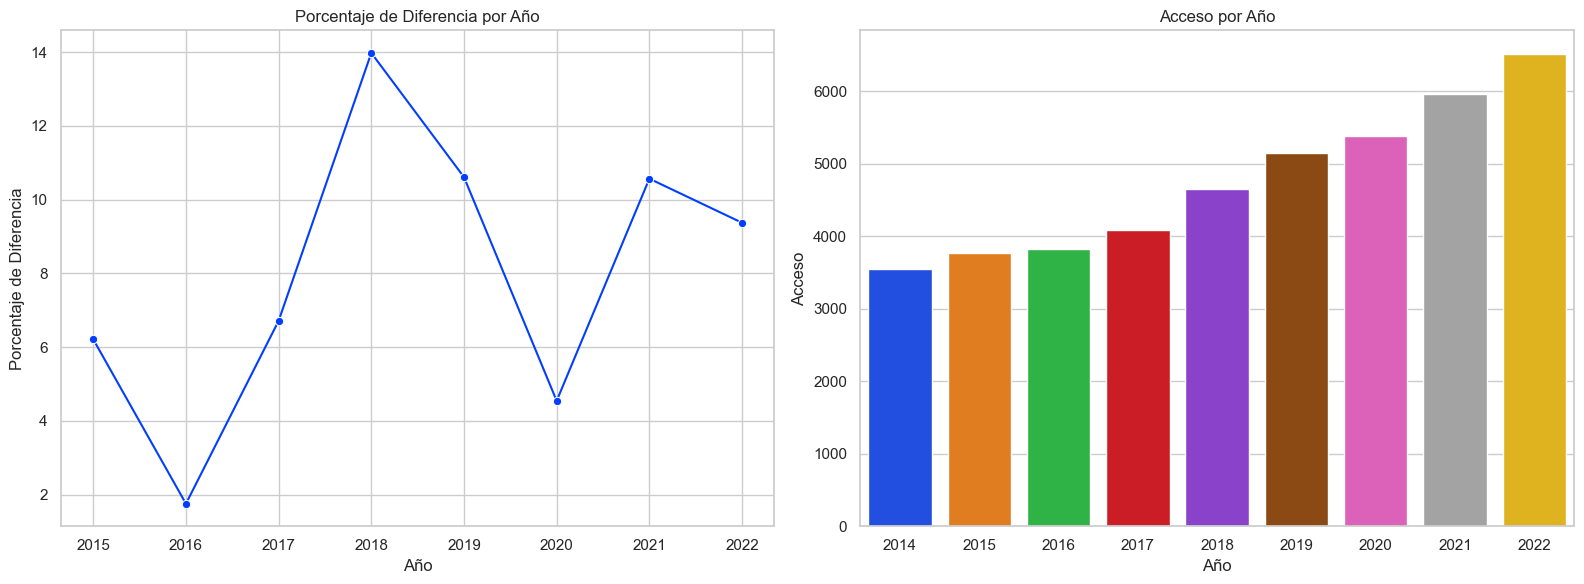

In [131]:
sns.set(style="whitegrid", palette="bright")

#---> Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#---> Gráfico de líneas para 'Porcentaje_Diferencia' por año
sns.lineplot(x='Anio', y='Porcentaje_Diferencia', data=Anio_group, marker='o', ax=axes[0])
axes[0].set_title('Porcentaje de Diferencia por Año')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Porcentaje de Diferencia')

#---> Gráfico de barras para 'Acceso' por año
sns.barplot(x='Anio', y='Acceso', data=Anio_group, ax=axes[1],palette="bright")
axes[1].set_title('Acceso por Año')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')

plt.tight_layout()
plt.show() #---> Visualizo el resultado

#### Podriamos decir que en el anio 2018 se registro un incremento considerable, en el anio 2020 se registro un incremento mucho mas pequenio causado por la pandemia, recordemos que estos graficos tienden a reflejar tambien el desarrollo de infraestructuras y tendido de nuevas lineas, lo cual en ese anio por causas mayores se veio afectado

<h1><center>Enfoque global en el incremento Trimestral</center></h1>

In [132]:
#---> Crear un grupo de datos por trimestre y sumar los accesos por cada 100 habitantes
trimestres = internet_penetracion.groupby(['Año','Trimestre'])['Accesos por cada 100 hogares'].sum()
anio = [x[0] for x in trimestres.index] #---> desanido los sets creados en la funcion de agrupamiento
trim = [x[1] for x in trimestres.index] #---> desanido los sets creados en la funcion de agrupamiento

trimestres = {
    'Anio' : anio,
    'Trimestre' : trim,
    'Acceso' : trimestres.values
}

trimestres = pd.DataFrame(trimestres)

trimestres = trimestres.sort_values(['Anio','Trimestre'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
trimestres['Porcentaje_Diferencia'] = trimestres['Acceso'].pct_change() * 100

trimestres.head(10) #---> Visualizo el resultado

,Anio,Trimestre,Acceso,Porcentaje_Diferencia
0,2014,1,867,NaN
1,2014,2,879,1.384083
2,2014,3,897,2.047782
3,2014,4,899,0.222965
4,2015,1,925,2.892102
5,2015,2,935,1.081081
6,2015,3,952,1.818182
7,2015,4,950,-0.210084
8,2016,1,933,-1.789474
9,2016,2,957,2.572347


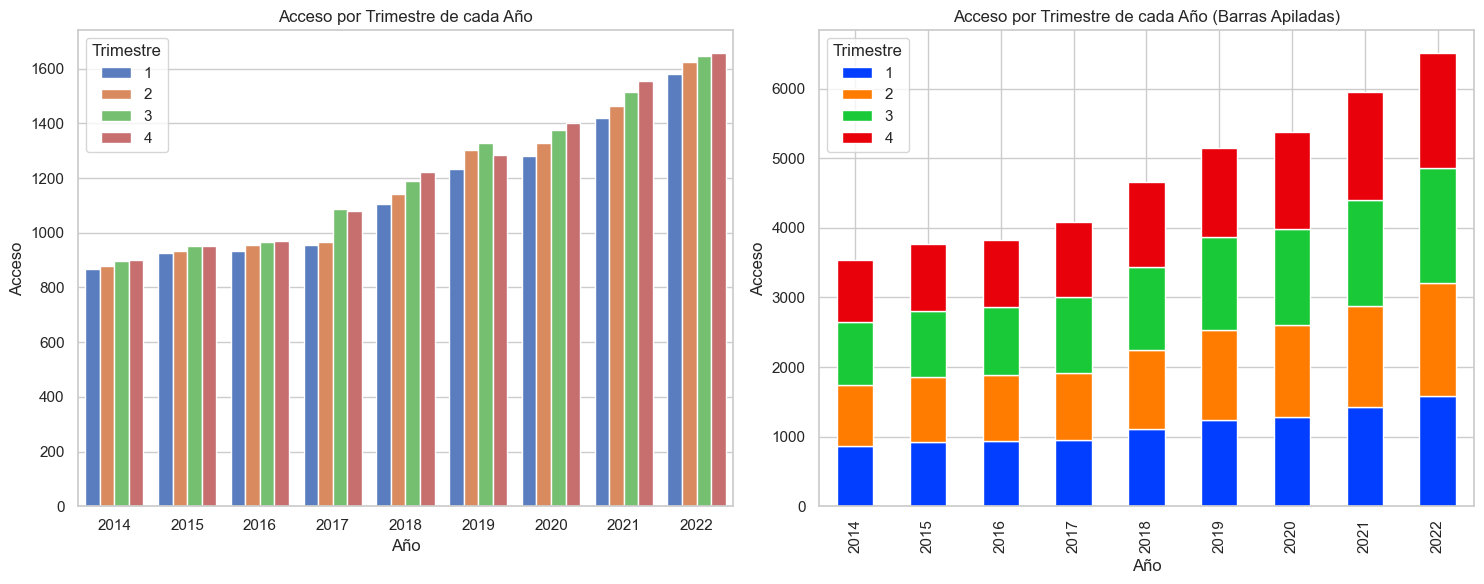

In [133]:
sns.set(style="whitegrid", palette="bright")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#---> Gráfico de barras para cada trimestre por año
barplot = sns.barplot(x='Anio', y='Acceso', hue='Trimestre', data=trimestres, palette='muted', ax=axes[0])

barplot.set_title('Acceso por Trimestre de cada Año')
barplot.set_xlabel('Año')
barplot.set_ylabel('Acceso')

barplot.legend(title='Trimestre')

#---> Crear el gráfico de barras apiladas con la columna 'Acceso'
stacked_data = trimestres.groupby(['Anio', 'Trimestre'])['Acceso'].sum().unstack()
stacked_data.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title('Acceso por Trimestre de cada Año (Barras Apiladas)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')

plt.tight_layout()
plt.show() #---> Visualizo los graficos


#### Incremento trimestral de accesos a internet por cada 100 hogares, en la representacion de las barras apiladas podemos verificar que el incremento paulatino es constante **exceptuando** el pasaje de 2019 al 2020

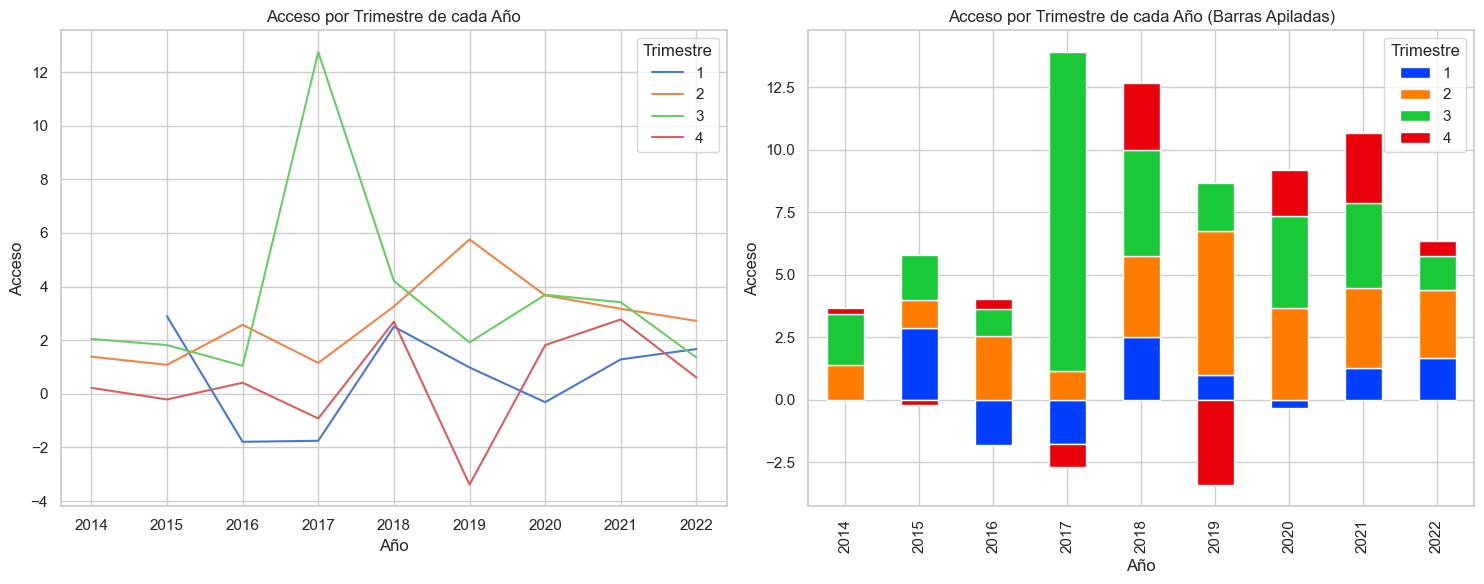

In [134]:
sns.set(style="whitegrid", palette="bright")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#---> Gráfico de barras para cada trimestre por año
barplot = sns.lineplot(x='Anio', y='Porcentaje_Diferencia', hue='Trimestre', data=trimestres, palette='muted', ax=axes[0])

barplot.set_title('Acceso por Trimestre de cada Año')
barplot.set_xlabel('Año')
barplot.set_ylabel('Acceso')

barplot.legend(title='Trimestre')

#---> Crear el gráfico de barras apiladas con la columna 'Acceso'
stacked_data = trimestres.groupby(['Anio', 'Trimestre'])['Porcentaje_Diferencia'].sum().unstack()
stacked_data.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title('Acceso por Trimestre de cada Año (Barras Apiladas)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')

plt.tight_layout()
plt.show()

#### Tomando como referencia los valores reflejados en el grafico, se llego a la conclusion de que el segundo y tercer trimestre de cada anio tienen un aumento significativo a diferencia del resto.

Informacion adicional: 
- A finales del 2019, ocurrio un cambio de gobierno en la nacion argentina.
- El 20 de marzo del 2020 inicio la etapa de pandemia.

---

## A nivel global llegue a la conclusion de priorizar 2 KPIS:

1. ### **Incrementar el porcentaje de llegada en los trimestres 1 y 4**, posibles ejemplos de accionar:

- Priorizar publicidad a etapas escolares en los inicios del trimestre 1

- descuentos en epocas cercanas a los festejos por finales de anio en el trimestre 4

2. ### **Incrementar el porcentaje de internet en situaciones de cambios gubernamentales**, posibles ejemplos de accionar:

- Enfocar publicidad en la accion mantener de cuotas por tiempos extendidos (ahorrando costos a largo plazo).


---

<h1><center>Enfoque en sectores Provinciales\Anual</center></h1>

In [135]:
internet_penetracion.head() #---> Volvemos a visualizar el dataframe con el que vamos a trabajar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66
3,2022,4,Chaco,44
4,2022,4,Chubut,86


In [136]:
#---> Crear un grupo de datos por trimestre y sumar los accesos por cada 100 habitantes
Provincial = internet_penetracion.groupby(['Año','Provincia'])['Accesos por cada 100 hogares'].sum()
anio = [x[0] for x in Provincial.index] #---> desanido los sets creados en la funcion de agrupamiento
Provincia = [x[1] for x in Provincial.index] #---> desanido los sets creados en la funcion de agrupamiento

Provincial = {
    'Anio' : anio,
    'Provincia' : Provincia,
    'Acceso' : Provincial.values
}

Provincial = pd.DataFrame(Provincial)

Provincial = Provincial.sort_values(['Acceso'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
Provincial['Porcentaje_Diferencia'] = round(Provincial['Acceso'].pct_change() * 100)

Provincial.dropna(inplace=True)

Provincial.head(10) #---> Visualizo el resultado

,Anio,Provincia,Acceso,Porcentaje_Diferencia
66,2016,San Luis,40,3.0
42,2015,San Luis,40,0.0
90,2017,San Luis,46,15.0
69,2016,Santiago Del Estero,62,35.0
21,2014,Santiago Del Estero,66,6.0
11,2014,La Rioja,66,0.0
59,2016,La Rioja,67,2.0
35,2015,La Rioja,68,1.0
45,2015,Santiago Del Estero,68,0.0
8,2014,Formosa,71,4.0


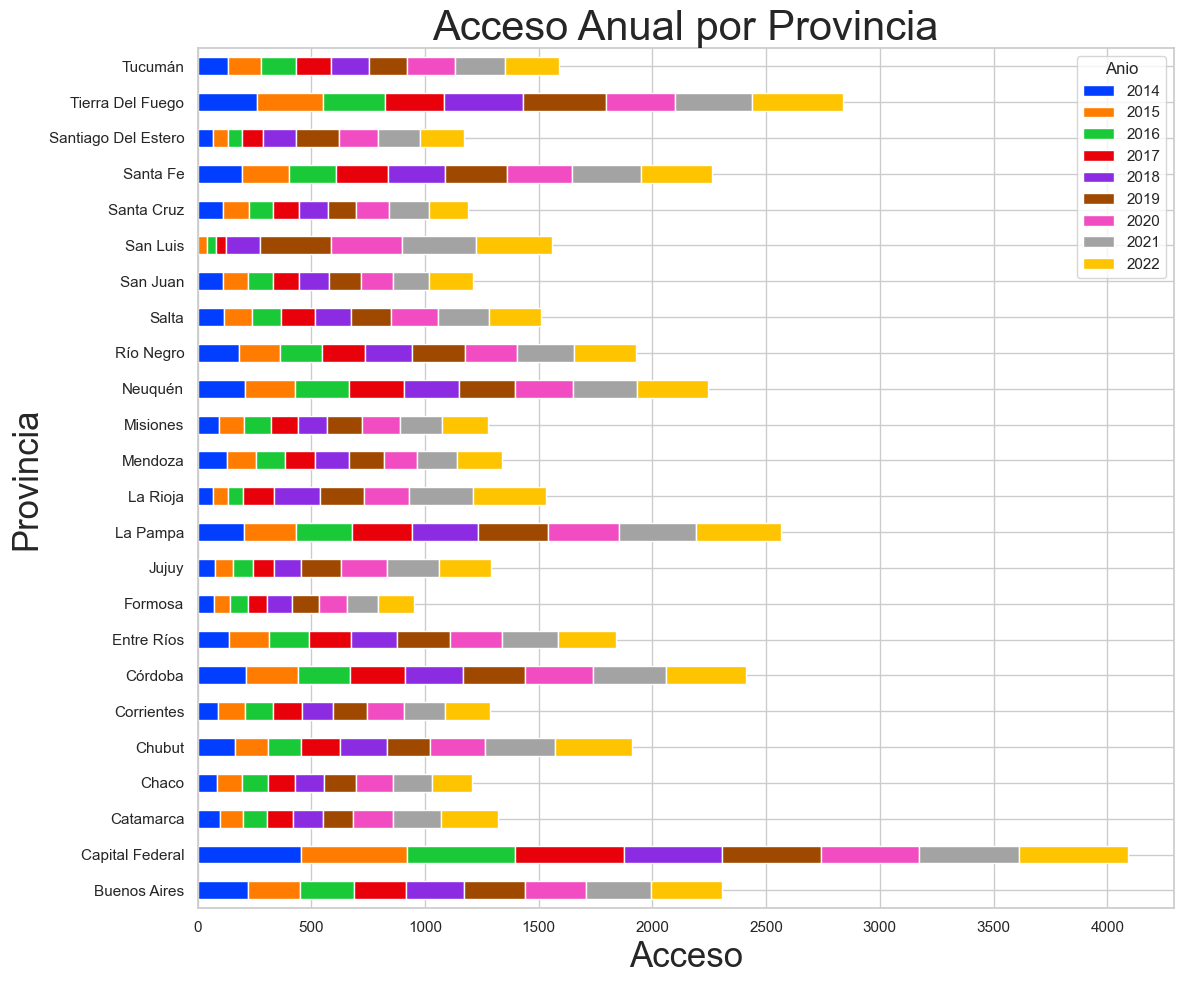

In [137]:
sns.set(style="whitegrid", palette="bright")


fig, axes = plt.subplots(figsize=(12, 10))

#---> Ordenar las barras apiladas en cada año de forma descendente
stacked_data = Provincial.groupby(['Provincia', 'Anio'])['Acceso'].sum().unstack()

#---> Crear un gráfico de barras apiladas con el eje y invertido
stacked_data.plot(kind='barh', stacked=True, ax=axes)

axes.set_title('Acceso Anual por Provincia', fontsize=30)
axes.set_xlabel('Acceso', fontsize=25)
axes.set_ylabel('Provincia', fontsize=25)

plt.tight_layout()
plt.show()

#### Visualizamos el crecimiento en porcentaje de anio a anio

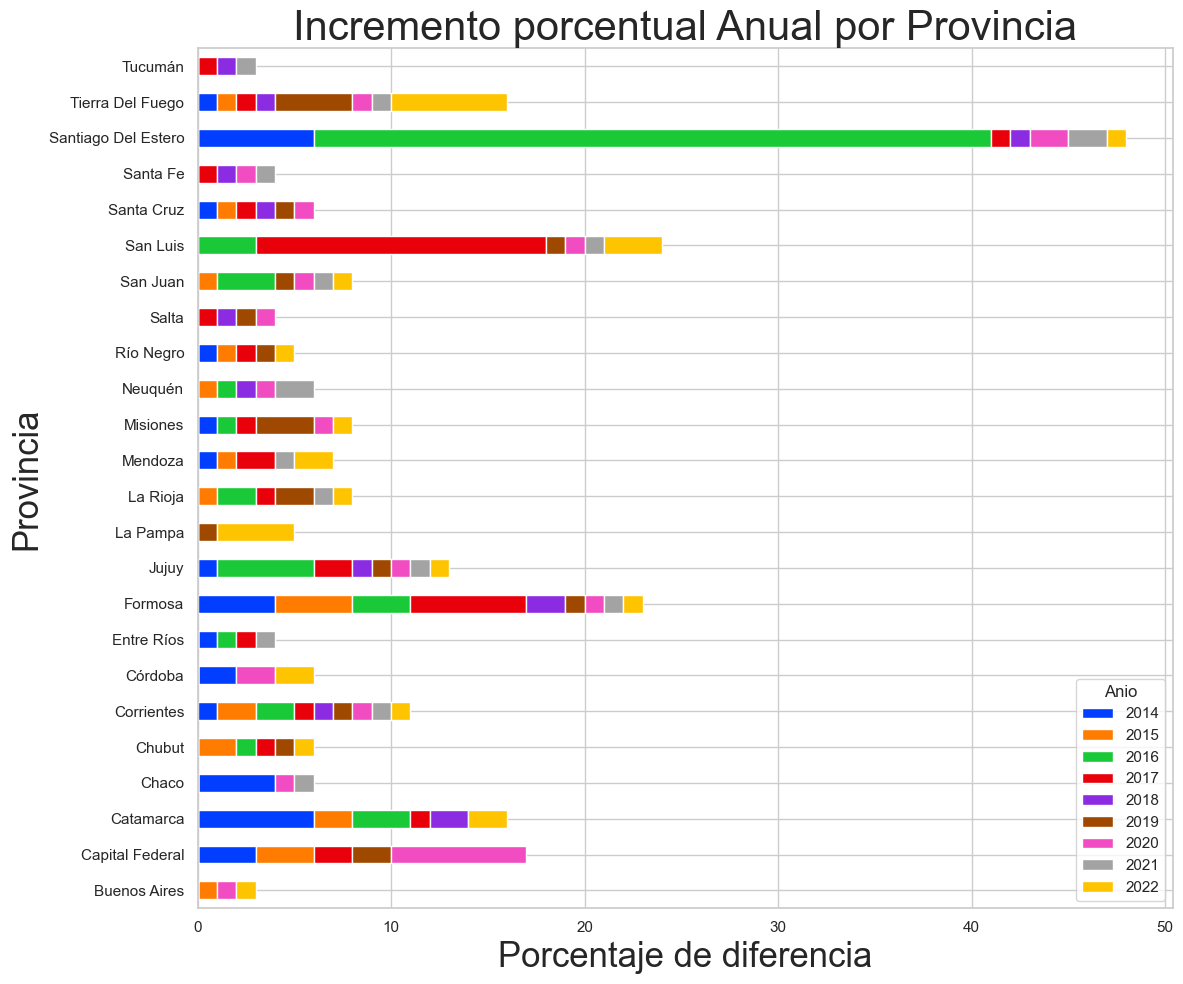

In [138]:
sns.set(style="whitegrid", palette="bright")

fig, axes = plt.subplots(figsize=(12, 10))

#---> Ordeno las barras apiladas en cada año de forma descendente
stacked_data = Provincial.groupby(['Provincia', 'Anio'])['Porcentaje_Diferencia'].sum().unstack()

#---> Cre0 un gráfico de barras apiladas con el eje y invertido
stacked_data.plot(kind='barh', stacked=True, ax=axes)

axes.set_title('Incremento porcentual Anual por Provincia', fontsize=30)
axes.set_xlabel('Porcentaje de diferencia', fontsize=25)
axes.set_ylabel('Provincia', fontsize=25)

plt.tight_layout()

plt.show()


### En 2016 tierra del fuego, surgio el proyecto denominado "Plan Federal de Internet", el cual consto de una nueva red de fibra optica con un largo de 33 mil kilometros, abasteciendo casi por completo la provincia

---

<h1><center>Enfoque en Sectores Provinciales</center></h1>

In [139]:
Provincial = internet_penetracion.groupby(['Provincia'])['Accesos por cada 100 hogares'].sum()

Provincial = {'Provincia' : Provincial.index, 'Acceso' : Provincial.values}

Provincial = pd.DataFrame(Provincial)

Provincial = Provincial.sort_values(['Acceso'], ascending=False) #---> Ordenar el DataFrame por año en orden ascendente

Provincial.dropna(inplace=True)

Provincial.head(10) #---> Visualizo el resultado

Provincial.head(3)

,Provincia,Acceso
1,Capital Federal,4089
22,Tierra Del Fuego,2836
10,La Pampa,2567


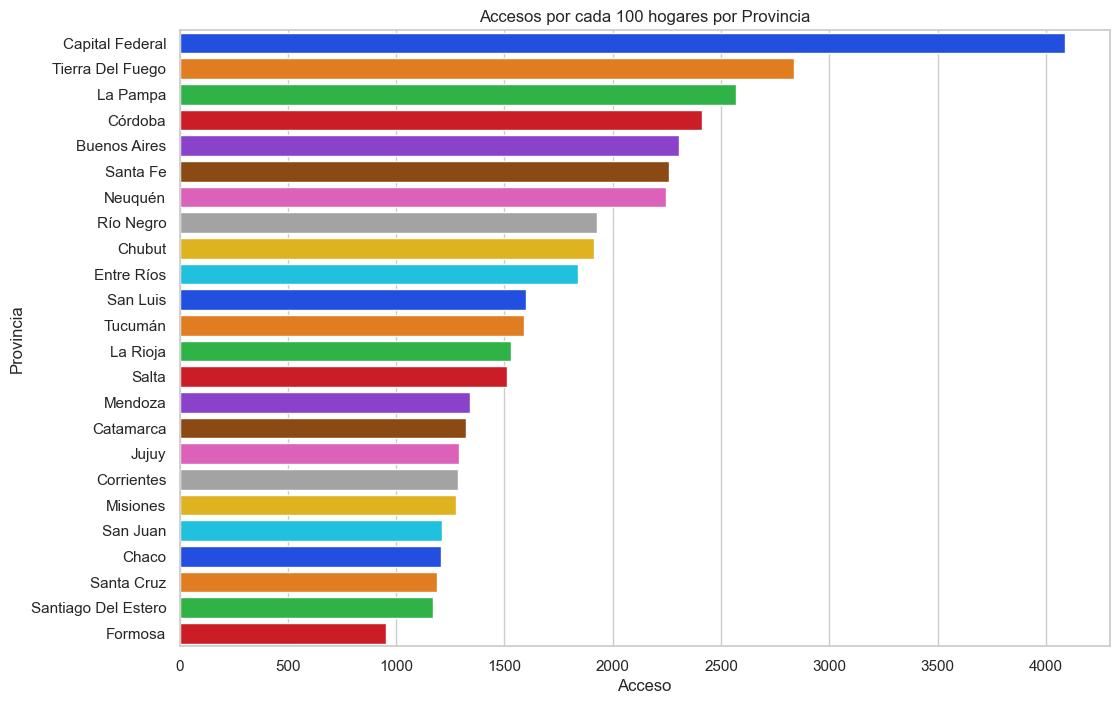

In [140]:
sns.set(style="whitegrid", palette="bright")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico según tu preferencia

barplot = sns.barplot(x='Acceso', y='Provincia', data=Provincial, palette='bright')

barplot.set_title('Accesos por cada 100 hogares por Provincia')

barplot.set_ylabel('Provincia')

plt.show()  # Muestra el gráfico de barras


In [141]:
#---> Calculo los cuartiles
cuartiles = Provincial['Acceso'].quantile([0.3, 0.5, 0.7])

#---> Función para asignar a cada provincia un sector (alto, medio, bajo)
def asignar_sector(valor):
    if valor > cuartiles[0.7]:
        return 'alto'
    elif valor > cuartiles[0.3]:
        return 'medio'
    else:
        return 'bajo'

#---> Aplicar la función para crear la columna 'Sector'
Provincial['Volumen_acceso'] = Provincial['Acceso'].apply(asignar_sector)

Provincial.head()

,Provincia,Acceso,Volumen_acceso
1,Capital Federal,4089,alto
22,Tierra Del Fuego,2836,alto
10,La Pampa,2567,alto
6,Córdoba,2412,alto
0,Buenos Aires,2304,alto


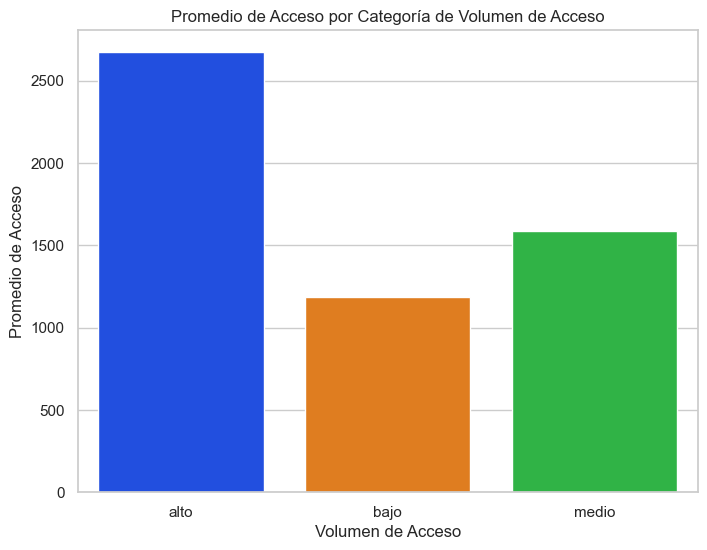

In [142]:
#---> Calcular el promedio de acceso para cada categoría de volumen_acceso
promedio_acceso = Provincial.groupby('Volumen_acceso')['Acceso'].mean().reset_index()

sns.set(style="whitegrid", palette="bright")

#---> Crear el gráfico de barras con los promedios de acceso por cada categoría de volumen_acceso
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Volumen_acceso', y='Acceso',hue='Volumen_acceso', data=promedio_acceso)

#---> Añadir etiquetas
barplot.set_title('Promedio de Acceso por Categoría de Volumen de Acceso')
barplot.set_xlabel('Volumen de Acceso')
barplot.set_ylabel('Promedio de Acceso')

plt.show()


### Hemos clasificado las provincias en tres sectores principales basados en su volumen de acceso. En esta ocasión, optamos por seleccionar las provincias pertenecientes al grupo de volumen medio. Este grupo se destaca por su gran potencial de inversión y crecimiento a corto o mediano plazo, así como por su alta densidad poblacional. Es importante destacar que, actualmente, estas áreas aún carecen de acceso a internet

In [143]:
Volumen_bajo = Provincial.loc[Provincial['Volumen_acceso'] == 'medio'] #---> guardo el los totales en un nuevo dataframe

provincias_volumen = Volumen_bajo['Provincia'].values #---> guardamos todas las provincias dentro de una variable para trabajar luego con ellas

Volumen_bajo

,Provincia,Acceso,Volumen_acceso
15,Río Negro,1926,medio
4,Chubut,1912,medio
7,Entre Ríos,1841,medio
18,San Luis,1599,medio
23,Tucumán,1590,medio
11,La Rioja,1531,medio
16,Salta,1510,medio
12,Mendoza,1341,medio
2,Catamarca,1321,medio
9,Jujuy,1292,medio


In [144]:
total_informacion_provincias_volumen = internet_penetracion.loc[internet_penetracion['Provincia'].isin(provincias_volumen)]

total_informacion_provincias_volumen = total_informacion_provincias_volumen.sort_values(['Provincia','Año','Trimestre'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

total_informacion_provincias_volumen

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
842,2014,1,Catamarca,24
818,2014,2,Catamarca,25
794,2014,3,Catamarca,25
770,2014,4,Catamarca,26
746,2015,1,Catamarca,25
...,...,...,...,...
119,2021,4,Tucumán,56
95,2022,1,Tucumán,57
71,2022,2,Tucumán,59
47,2022,3,Tucumán,61


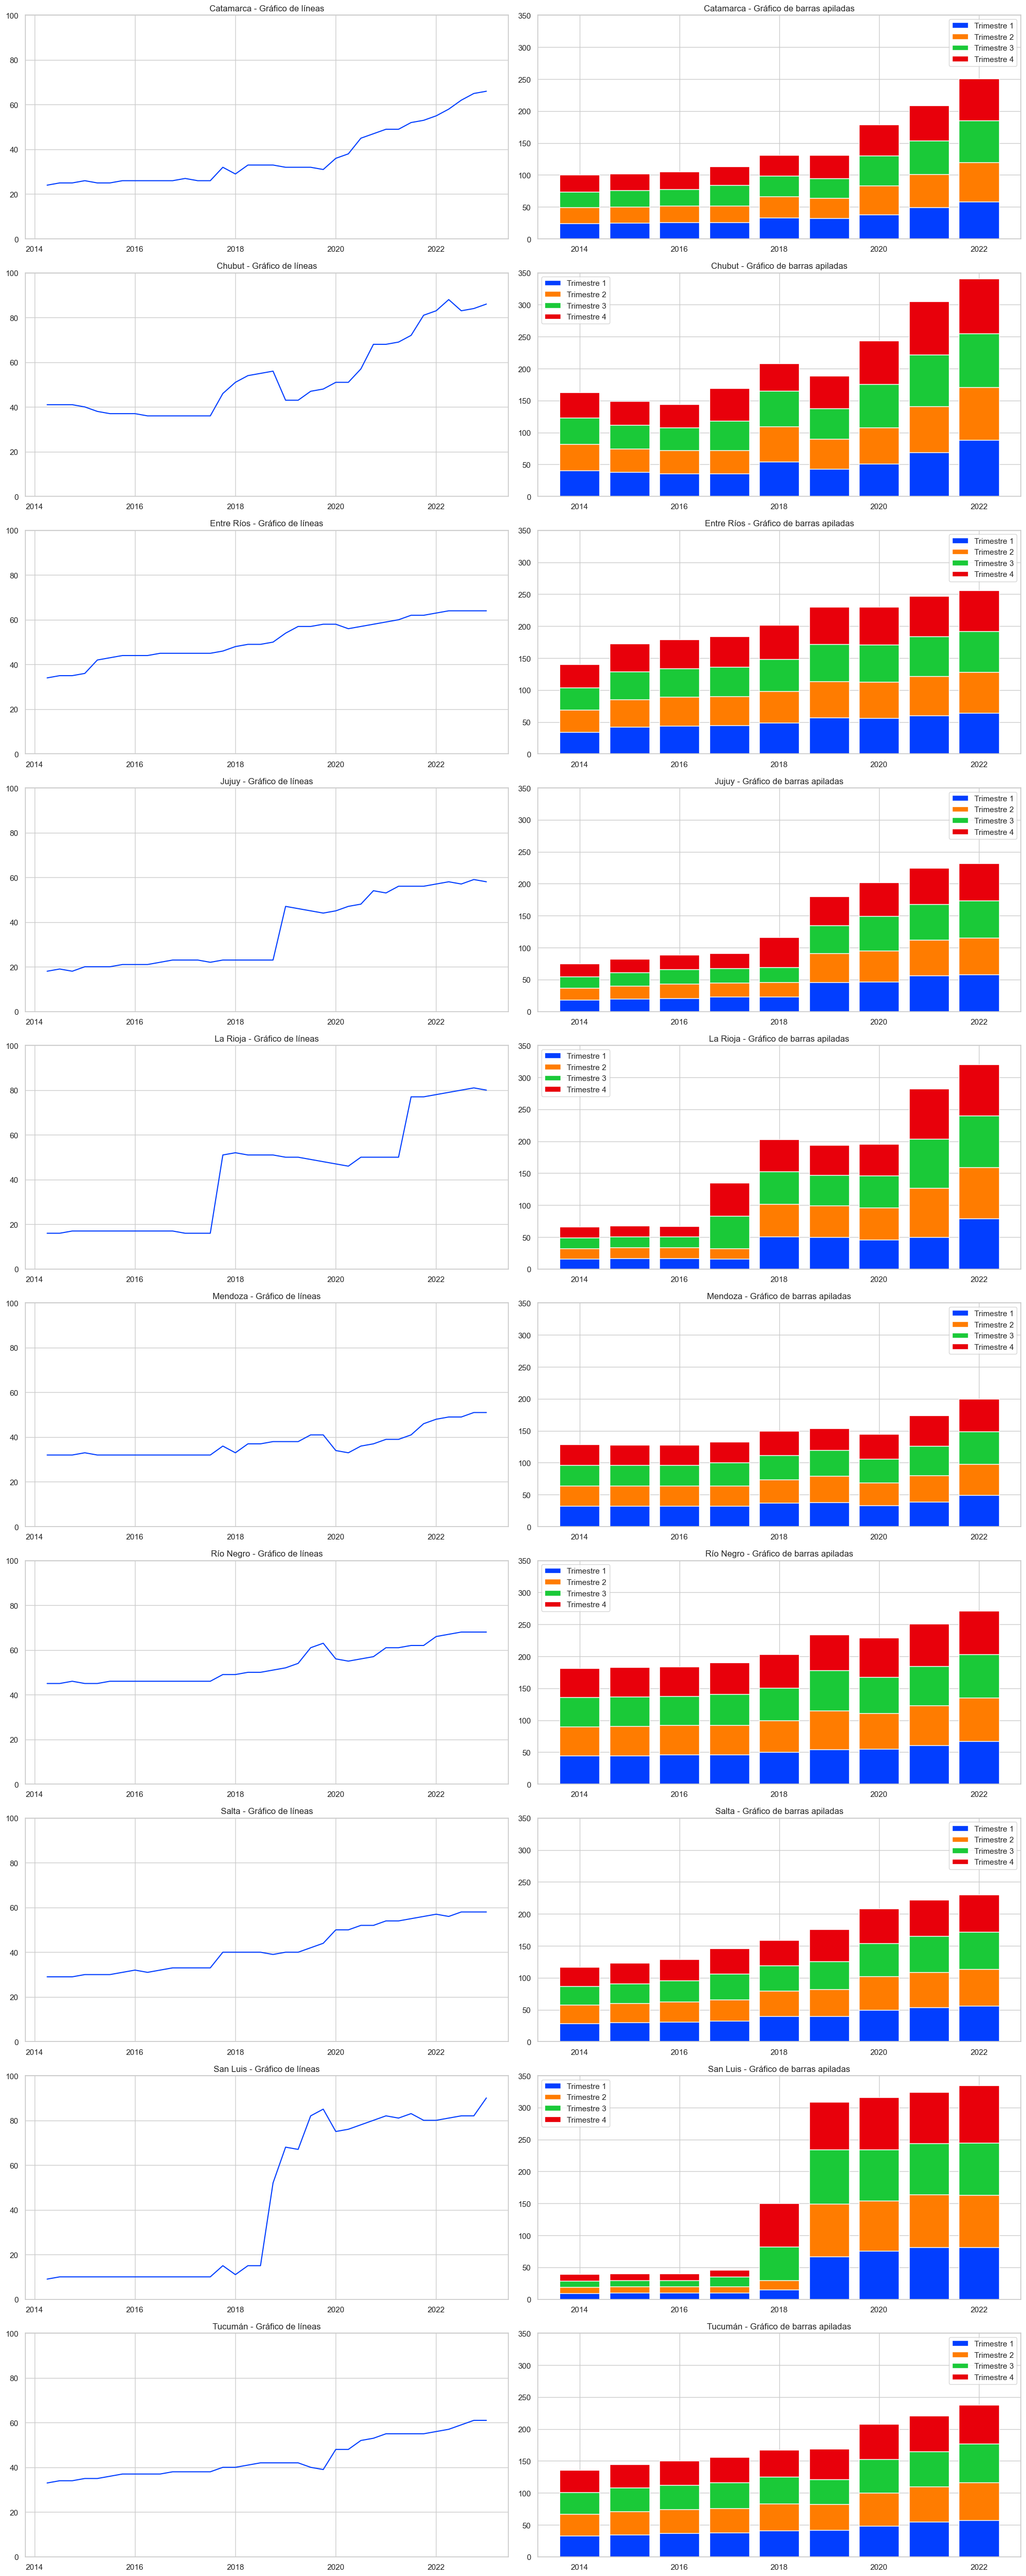

In [145]:
provincias = total_informacion_provincias_volumen['Provincia'].unique()

fig, axs = plt.subplots(len(provincias), 2, figsize=(20, 5*len(provincias)))

#---> Para cada provincia, crea un gráfico de líneas y un gráfico de barras apiladas
for i, provincia in enumerate(provincias):
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == provincia]
    
    #---> Gráfico de líneas
    axs[i, 0].plot(data_provincia['Año'] + data_provincia['Trimestre']/4, data_provincia['Accesos por cada 100 hogares'])
    axs[i, 0].set_title(f'{provincia} - Gráfico de líneas')
    axs[i, 0].set_ylim([0, 100])  # Establece la escala del eje y
    
    #---> Gráfico de barras apiladas
    years = data_provincia['Año'].unique()
    bottom = np.zeros(len(years))
    for trimestre in sorted(data_provincia['Trimestre'].unique()):
        data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
        axs[i, 1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
        bottom += data_trimestre['Accesos por cada 100 hogares'].values
    axs[i, 1].set_title(f'{provincia} - Gráfico de barras apiladas')
    axs[i, 1].legend()
    axs[i, 1].set_ylim([0, 350])  #---> Establece la escala del eje y

#---> Muestra el gráfico
plt.tight_layout()
plt.show()

---

<h1> <center>Tecnologia y Velocidad por Provincia de volumen medio</center> </h1>

In [159]:
tecnologia_provincia = pd.read_csv(r'..\Data\Internet_Accesos-por-tecnologia.csv') #---> Leo el dataset referido al acceso por tecnologia

#---> ETL
tecnologia_provincia = tecnologia_provincia.loc[tecnologia_provincia['Provincia'].isin(provincias_volumen)] 

tecnologia_provincia['Trimestre'] = tecnologia_provincia['Trimestre'].str.replace(' *', '').astype(int) #---> Realizo normalizacion de los valores de la columna Trimestre

tecnologia_provincia['Año'] = tecnologia_provincia['Año'].str.replace(' *', '').astype(int) #---> Realizo normalizacion de los valores de la columna Año

tecnologia_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
7,2022,4,Entre Ríos,55507.0,135746.0,40798.0,26414.0,12509.0,270974.0
9,2022,4,Jujuy,17880.0,52390.0,42626.0,4067.0,1255.0,118218.0
11,2022,4,La Rioja,6120.0,54387.0,19328.0,6395.0,32.0,86262.0
...,...,...,...,...,...,...,...,...,...
852,2014,1,Mendoza,148970.0,12076.0,2480.0,37.0,2282.0,165845.0
855,2014,1,Río Negro,64886.0,24156.0,876.0,3576.0,1572.0,95066.0
856,2014,1,Salta,73131.0,17538.0,45.0,8.0,568.0,91290.0
858,2014,1,San Luis,11306.0,428.0,354.0,21.0,448.0,12557.0


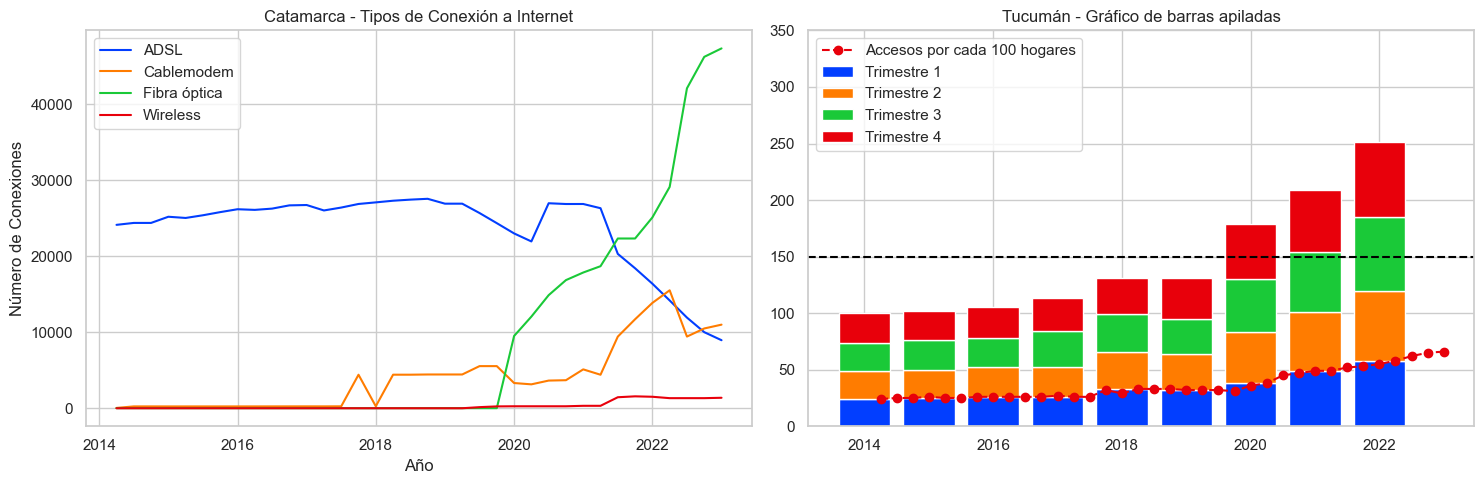

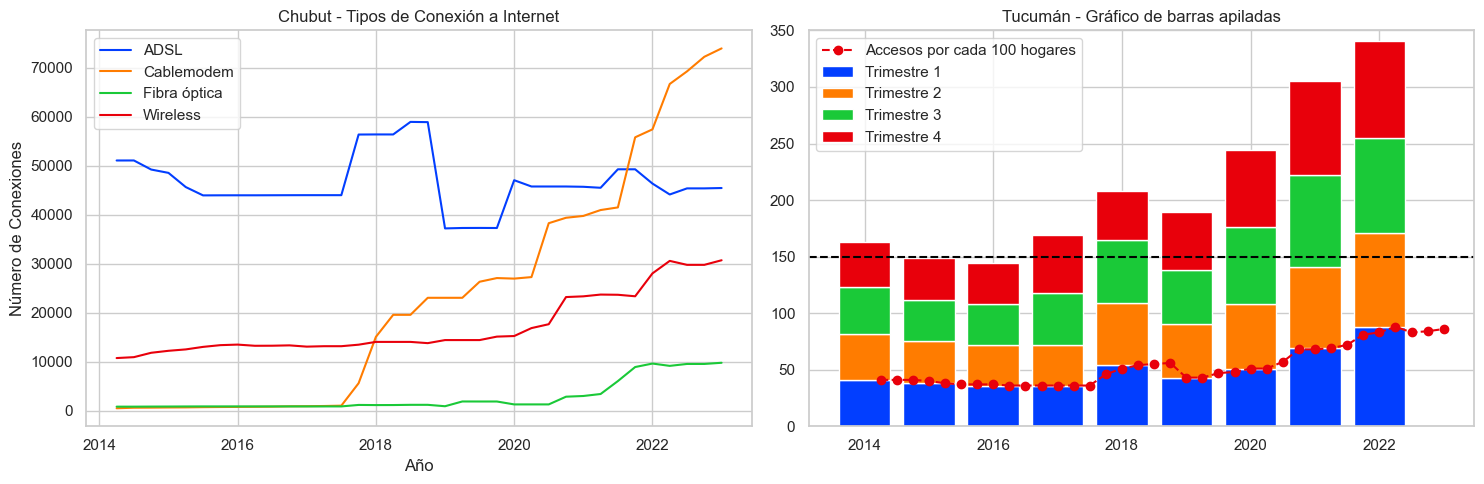

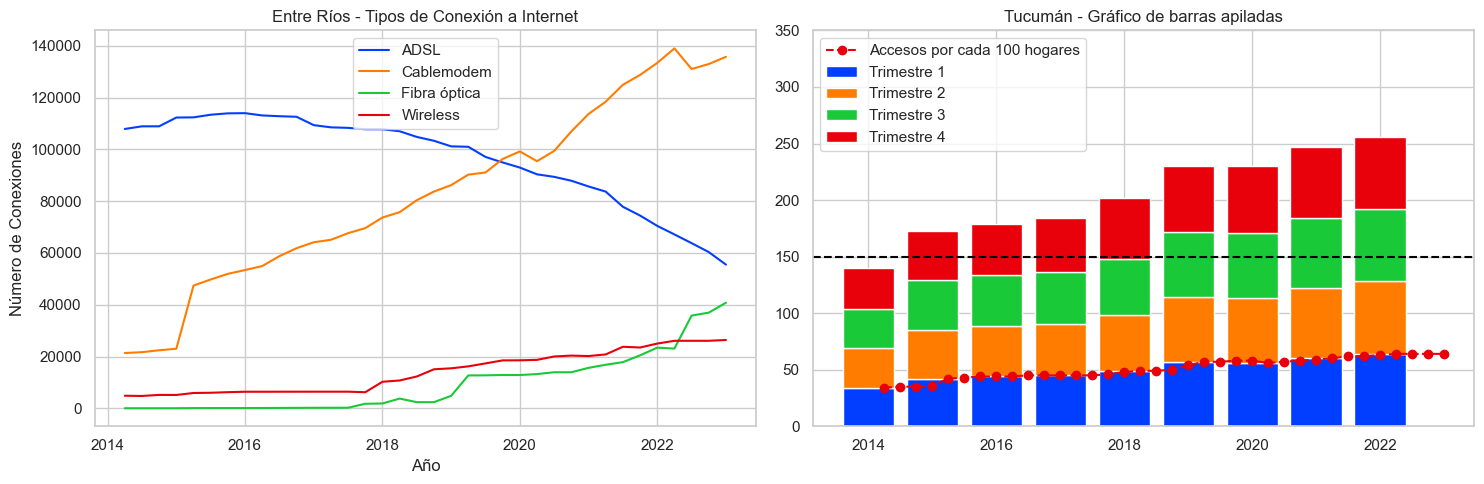

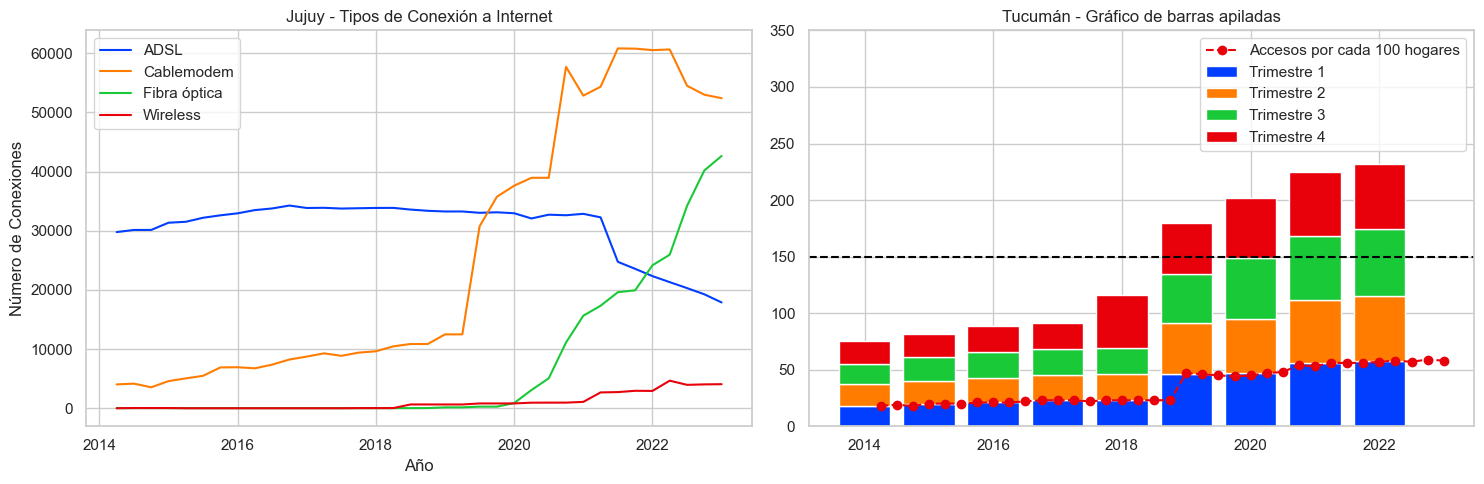

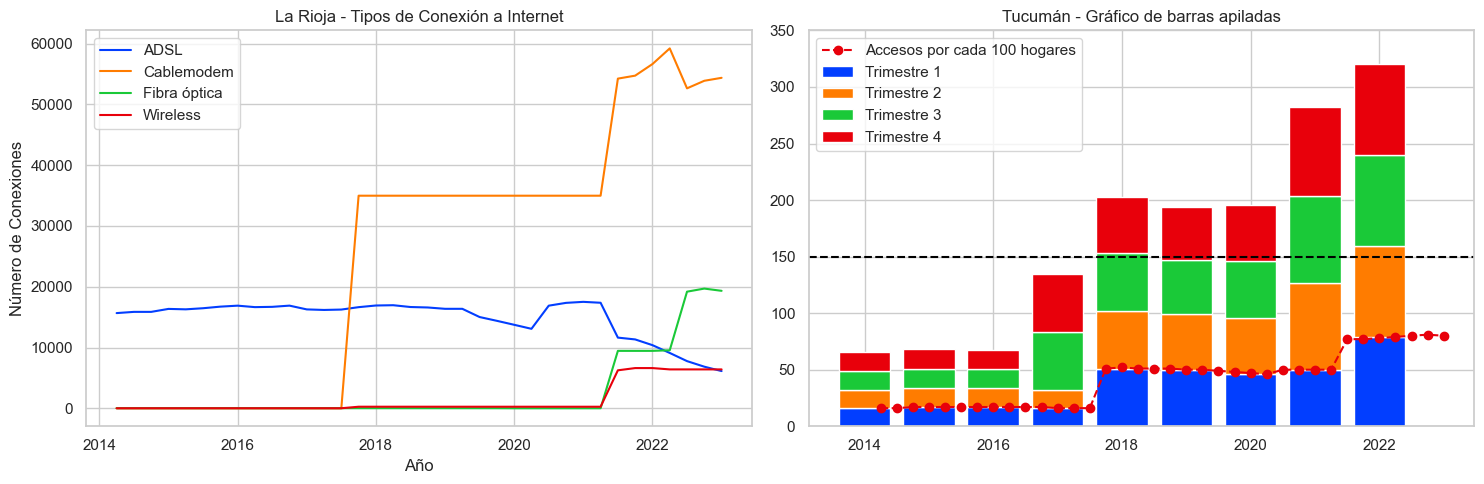

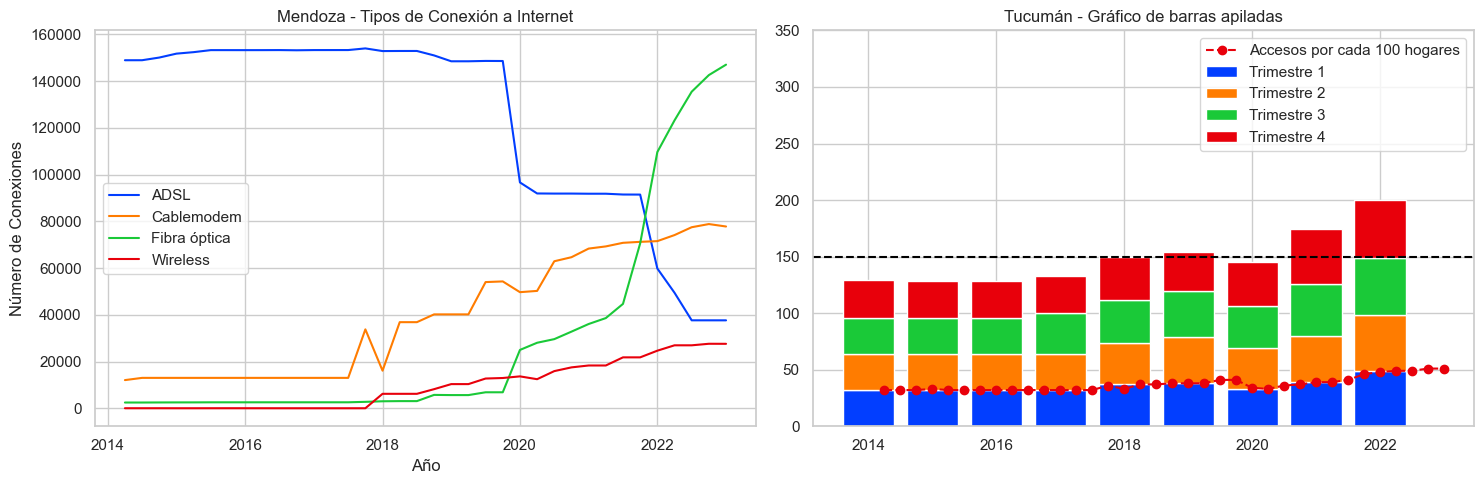

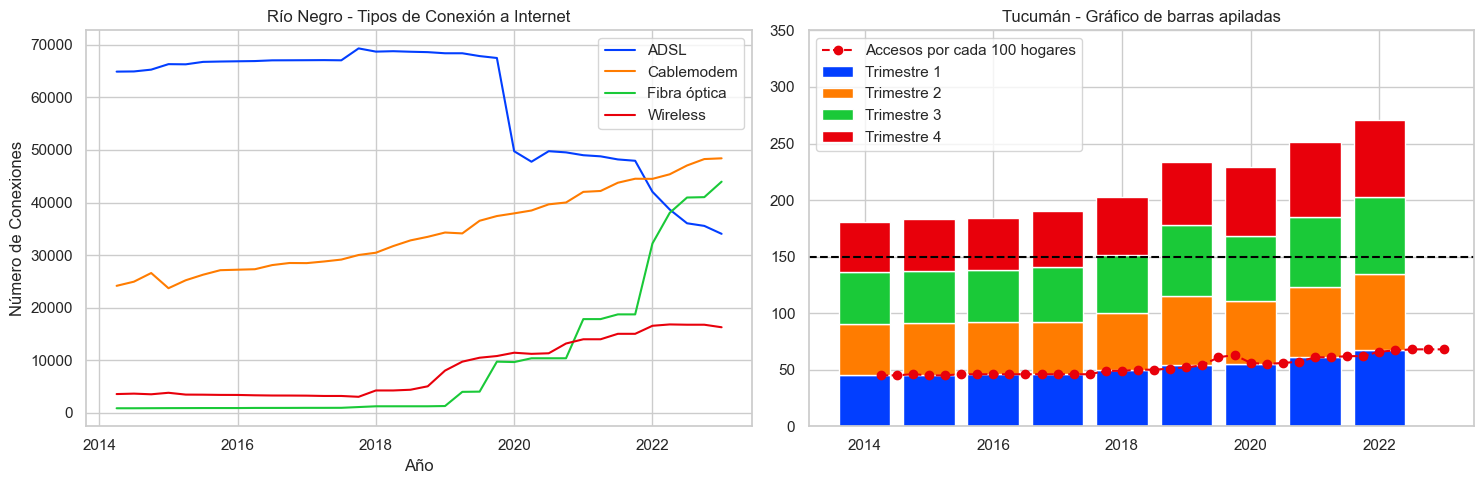

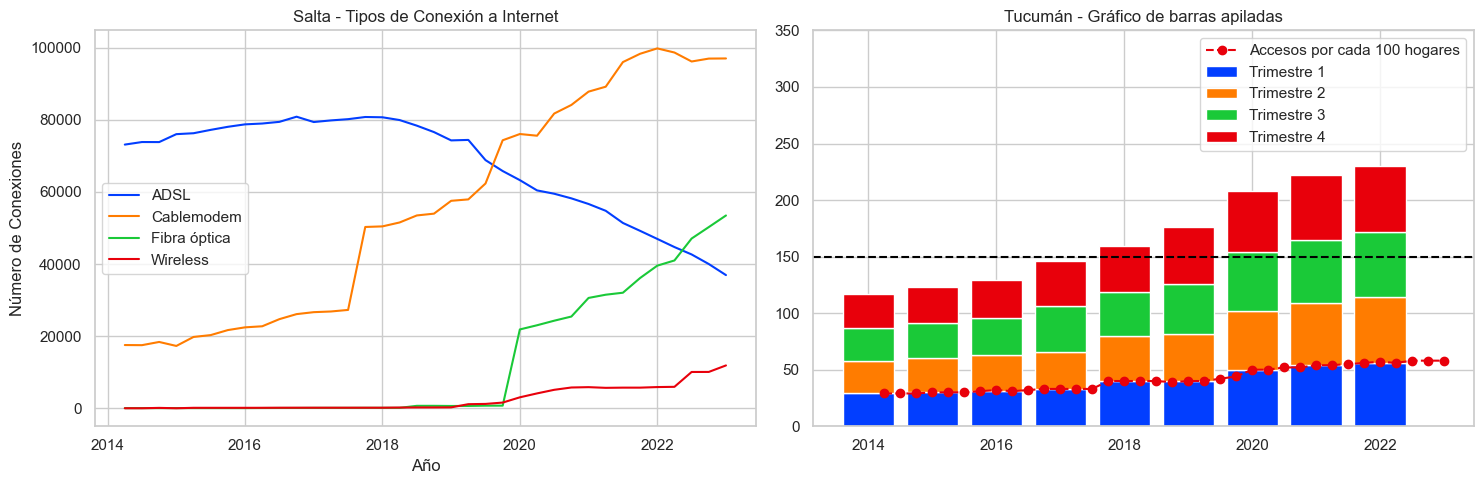

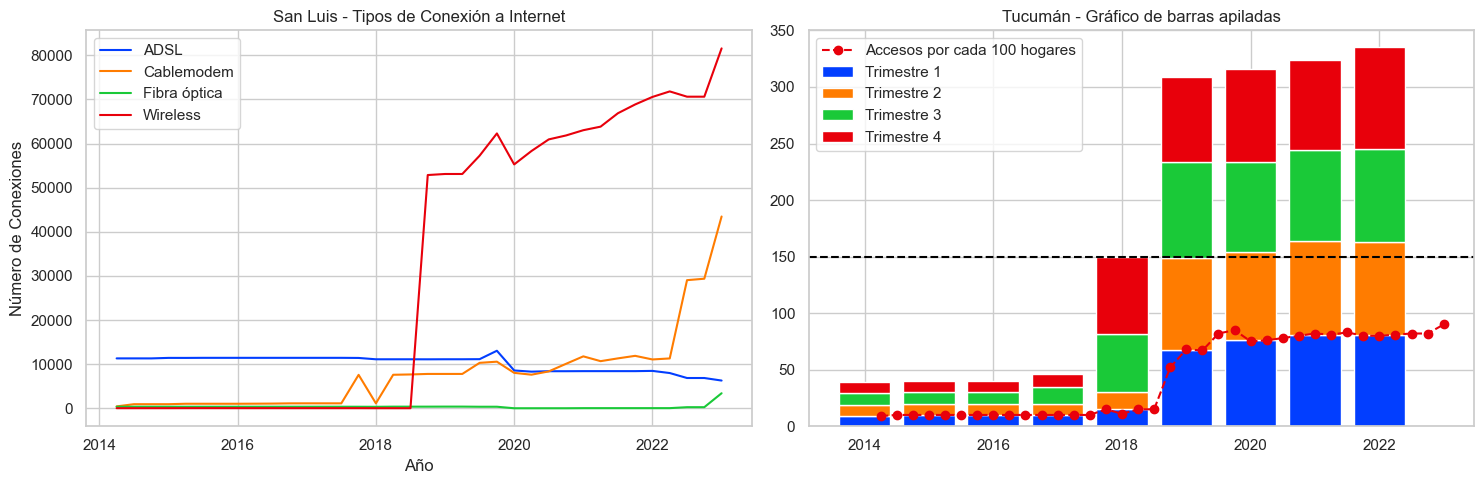

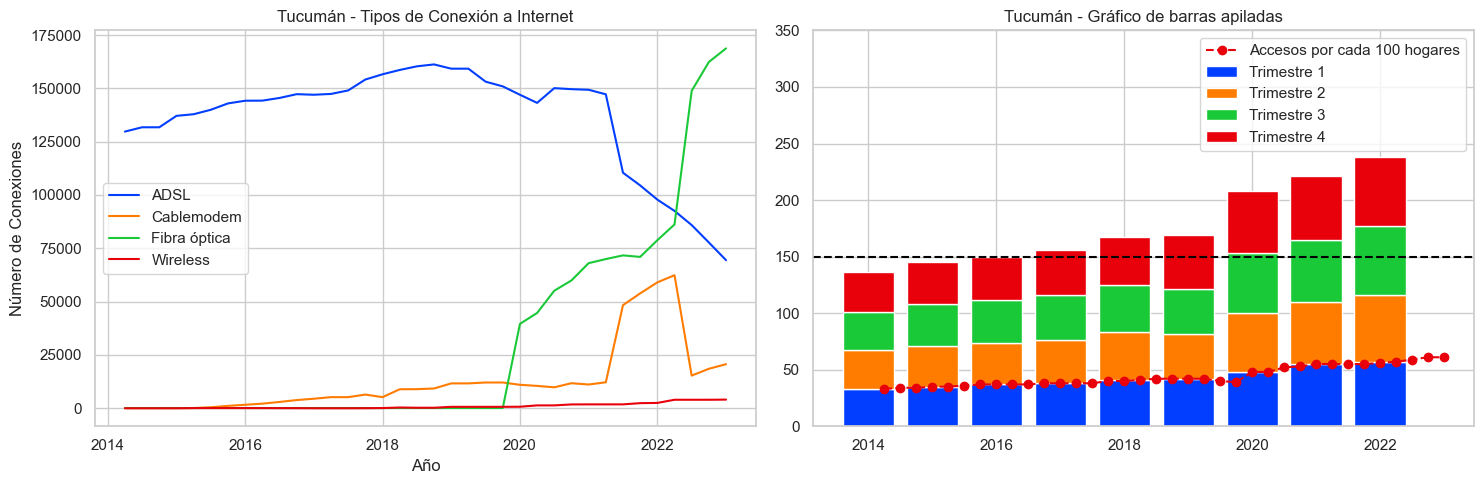

In [147]:
for x in tecnologia_provincia['Provincia'].unique():

    df_provincia = tecnologia_provincia[tecnologia_provincia['Provincia'] == x]
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == x]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    if len(df_provincia) > 0:
        #---> Gráfico 1 - Primer conjunto
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['ADSL'], label='ADSL')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Cablemodem'], label='Cablemodem')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Fibra óptica'], label='Fibra óptica')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Wireless'], label='Wireless')

        axs[0].set_title(f'{x} - Tipos de Conexión a Internet')
        axs[0].set_xlabel('Año')
        axs[0].set_ylabel('Número de Conexiones')
        axs[0].legend()

    if len(data_provincia) > 0:
        #---> Gráfico 2 - Segundo conjunto
        years = data_provincia['Año'].unique()
        bottom = np.zeros(len(years))

        axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
        axs[1].set_title(f'{provincia} - Gráfico de líneas')
        axs[1].set_ylim([0, 100])

        for trimestre in sorted(data_provincia['Trimestre'].unique()):
            data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
            axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
            bottom += data_trimestre['Accesos por cada 100 hogares'].values

        axs[1].set_title(f'{provincia} - Gráfico de barras apiladas')
        axs[1].legend()
        axs[1].set_ylim([0, 350])
        axs[1].axhline(y=150, linestyle='--', color='black')
    plt.tight_layout()
    plt.show()

### Uno de los indicadores clave a tener en cuenta es el incremento en la inversión destinada a la infraestructura inalámbrica. En el contexto actual, la adquisición de dispositivos como smartphones, laptops o tablets se ha vuelto considerablemente más accesible. Esta accesibilidad nos ofrece una visión nítida sobre la tendencia del mercado, apuntando claramente hacia la preferencia por la conectividad inalámbrica y el impacto creciente de esta tecnología en la sociedad.

En la seccion superior podemos observar la relacion que tienen los incrementos en diferentes tecnologias con la tasa de acceso al internet, evidentemente el aumento en las inversiones en brindar un servicio estable y potente se ve reflejado en la poblacion.

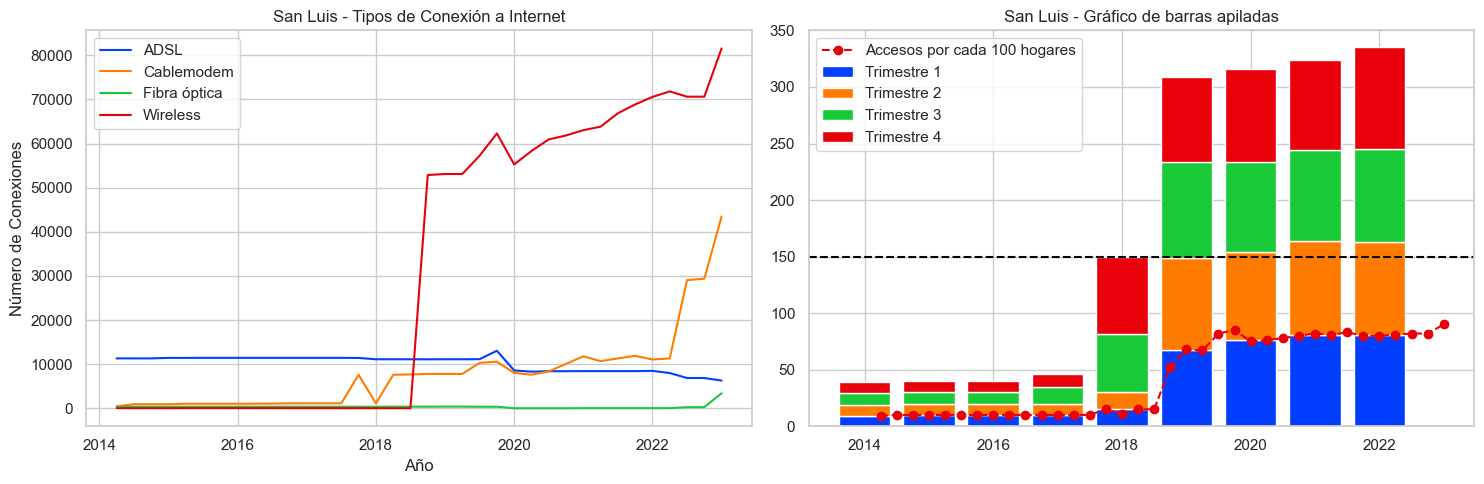

In [161]:
provincia = 'San Luis'

df_provincia = tecnologia_provincia[tecnologia_provincia['Provincia'] == provincia]
data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == provincia]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

if len(df_provincia) > 0:
    #---> Gráfico 1 - Primer conjunto
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['ADSL'], label='ADSL')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Cablemodem'], label='Cablemodem')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Fibra óptica'], label='Fibra óptica')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Wireless'], label='Wireless')

    axs[0].set_title(f'{provincia} - Tipos de Conexión a Internet')
    axs[0].set_xlabel('Año')
    axs[0].set_ylabel('Número de Conexiones')
    axs[0].legend()

if len(data_provincia) > 0:
    #---> Gráfico 2 - Segundo conjunto
    years = data_provincia['Año'].unique()
    bottom = np.zeros(len(years))

    axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
    axs[1].set_title(f'{provincia} - Gráfico de líneas')
    axs[1].set_ylim([0, 100])

    for trimestre in sorted(data_provincia['Trimestre'].unique()):
        data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
        axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
        bottom += data_trimestre['Accesos por cada 100 hogares'].values

    axs[1].set_title(f'{provincia} - Gráfico de barras apiladas')
    axs[1].legend()
    axs[1].set_ylim([0, 350])
    axs[1].axhline(y=150, linestyle='--', color='black')
    
plt.tight_layout()
plt.show()

#### como ejemplo de primera linea tenemos a san luis, en donde se implemento una campania expandiendo la coneccion del tipo wireles sobre toda la zona, esto efectivamente aumento la cantidad de accesos por hogar de forma exponencial.

---

In [149]:
velocidad_provincia = pd.read_csv(r'..\Data\Internet_Accesos-por-velocidad.csv') #---> Leo el dataset referido al acceso por velocidad de internet
velocidad_provincia = velocidad_provincia.loc[velocidad_provincia['Provincia'].isin(provincias_volumen)]
velocidad_provincia #---> Visualizo el 

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0
7,2022,4,Entre Ríos,107.0,4722.0,45629.0,46700.0,20927.0,22483.0,130406.0,0.0,270974.0
9,2022,4,Jujuy,58.0,1763.0,18652.0,14070.0,36430.0,335.0,46910.0,0.0,118218.0
11,2022,4,La Rioja,18.0,595.0,2531.0,3010.0,24435.0,5029.0,50644.0,0.0,86262.0
...,...,...,...,...,...,...,...,...,...,...,...,...
852,2014,1,Mendoza,35.0,6.0,166655.0,19.0,10.0,6.0,9.0,0.0,166740.0
855,2014,1,Río Negro,4670.0,4618.0,84304.0,73.0,1062.0,1.0,8.0,0.0,94736.0
856,2014,1,Salta,53.0,19677.0,64061.0,7192.0,314.0,0.0,0.0,0.0,91297.0
858,2014,1,San Luis,7.0,3.0,12544.0,0.0,1.0,0.0,2.0,0.0,12557.0


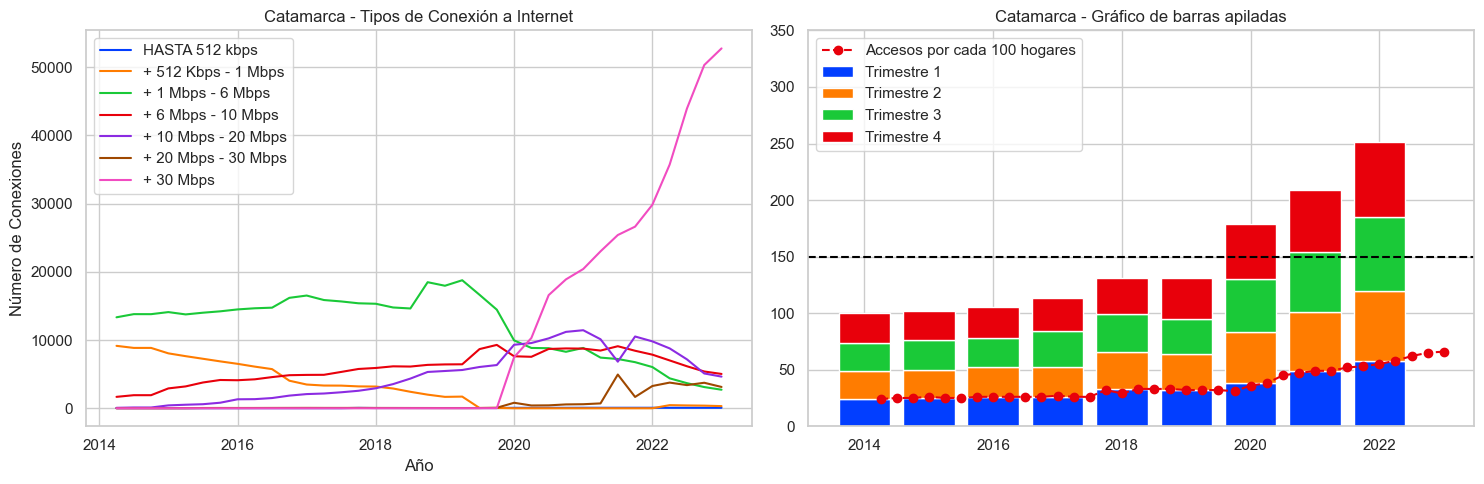

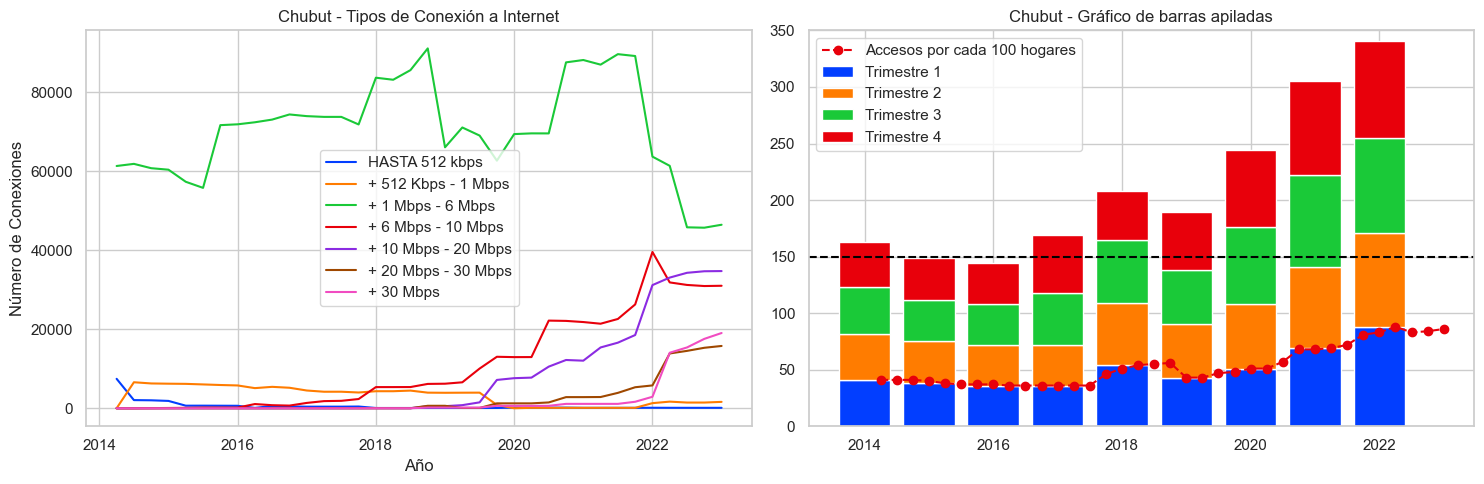

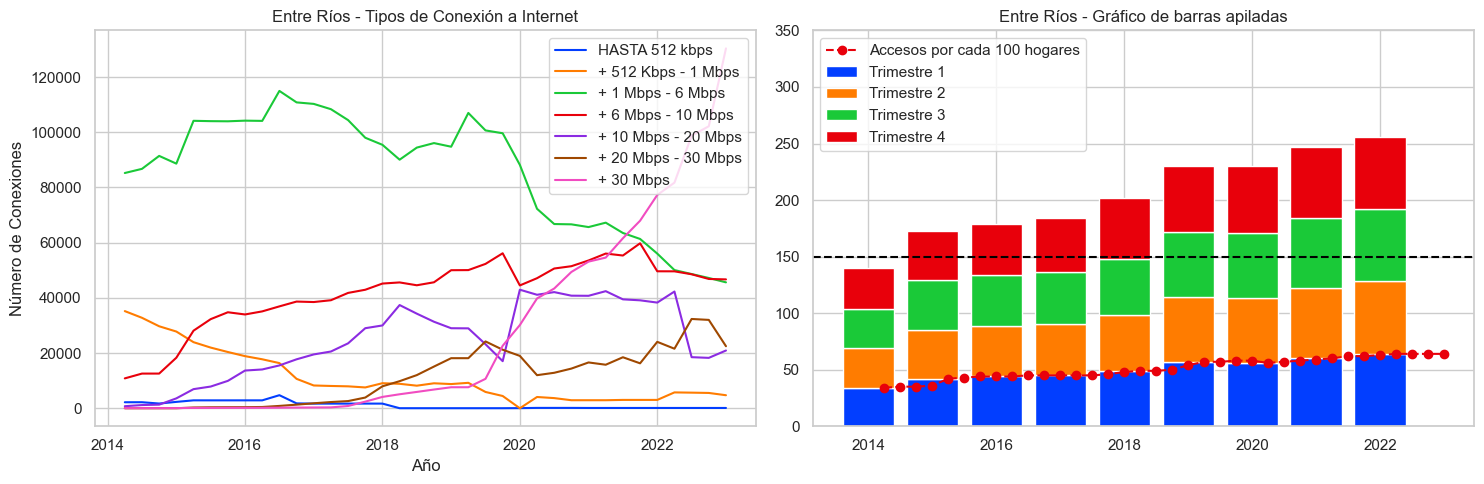

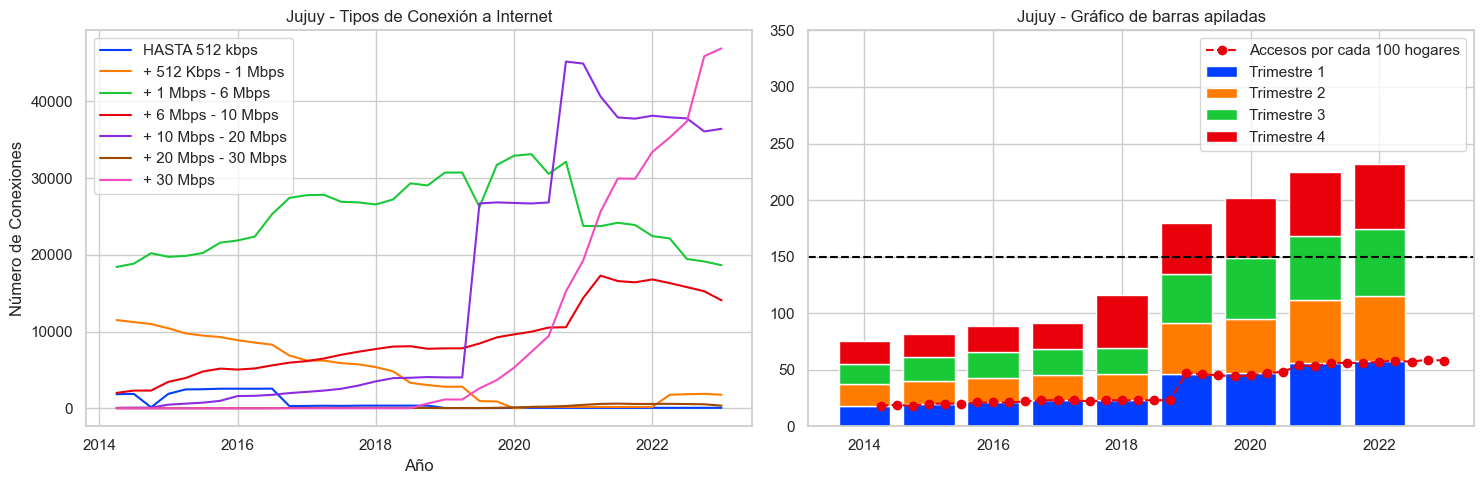

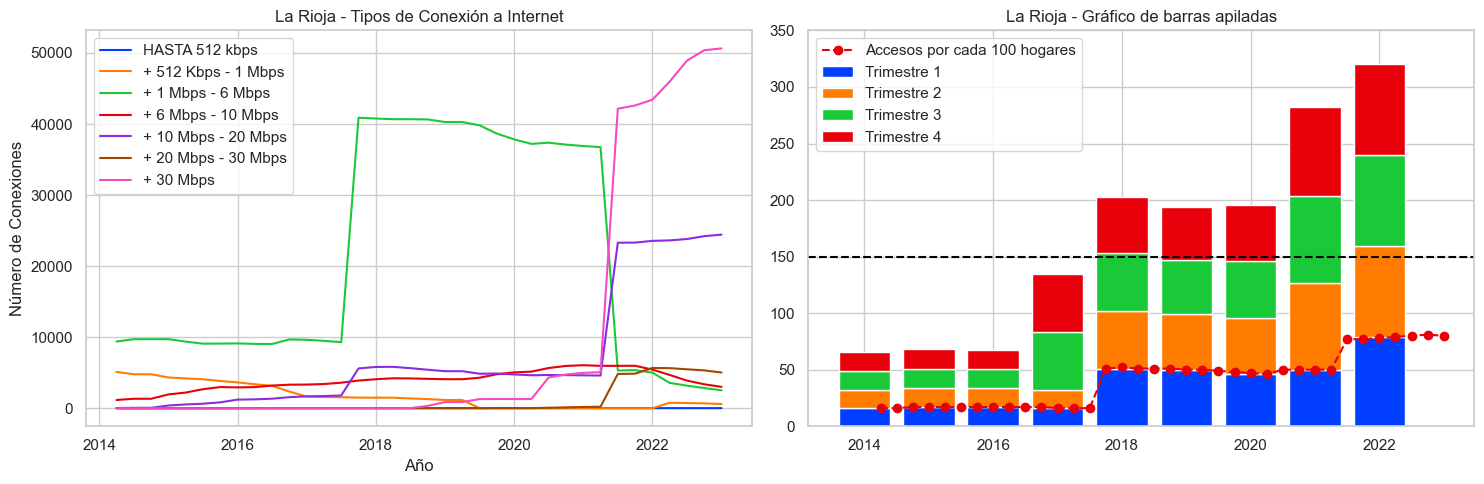

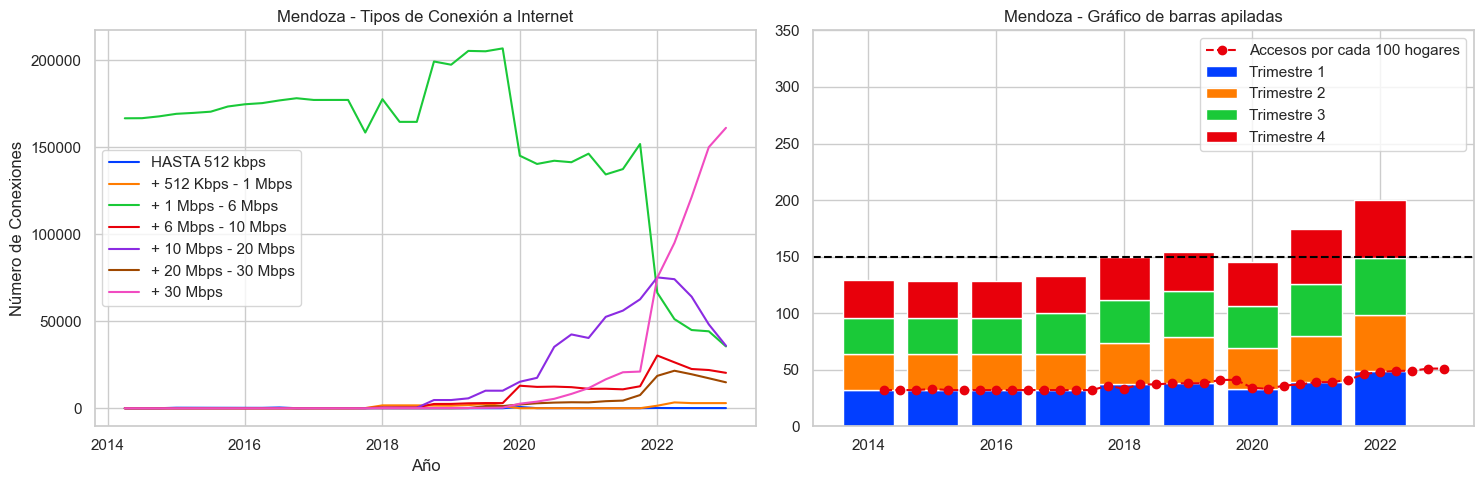

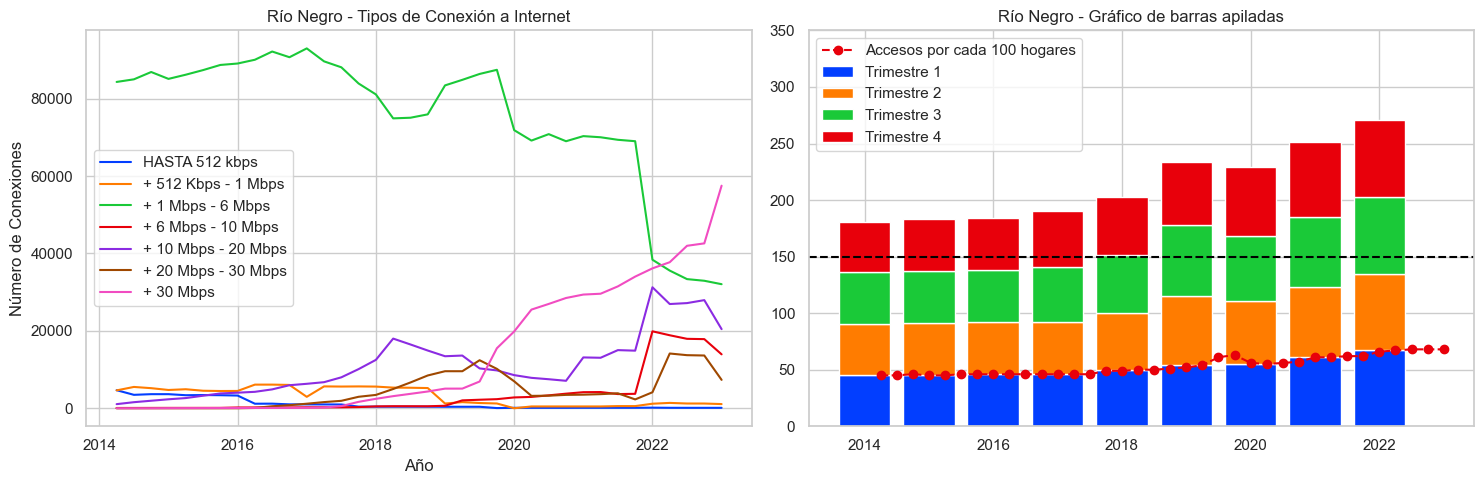

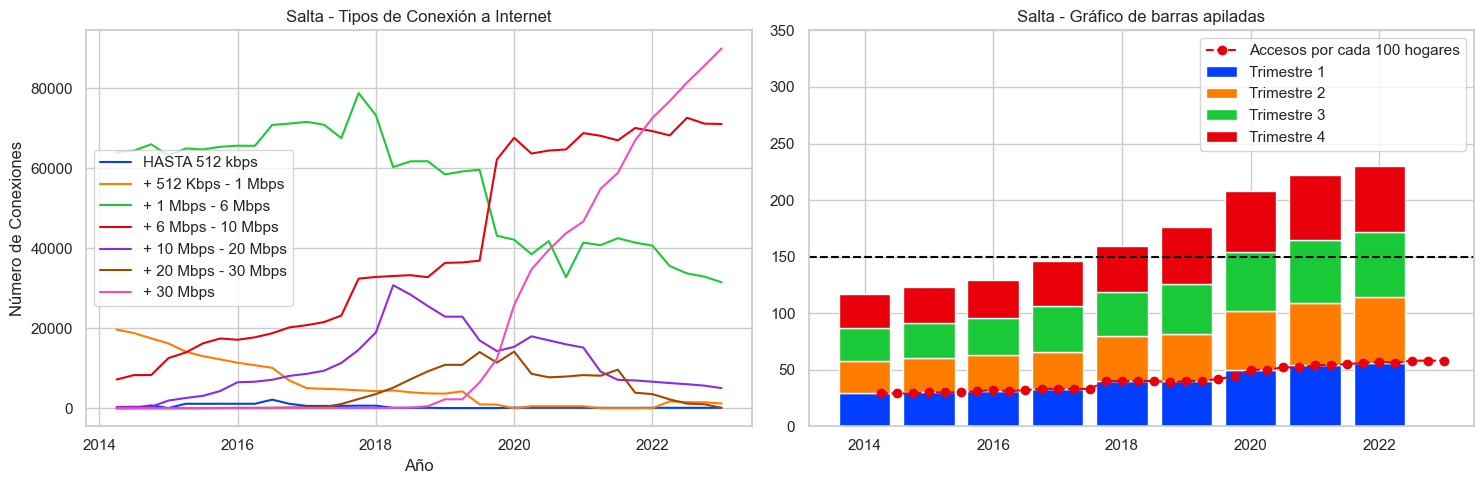

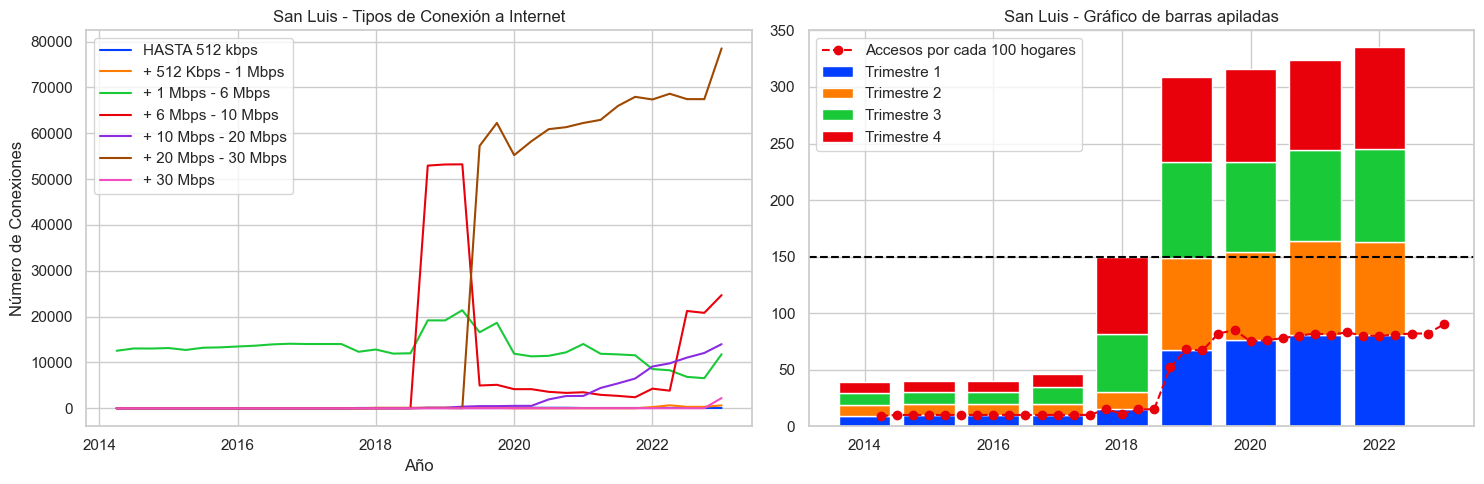

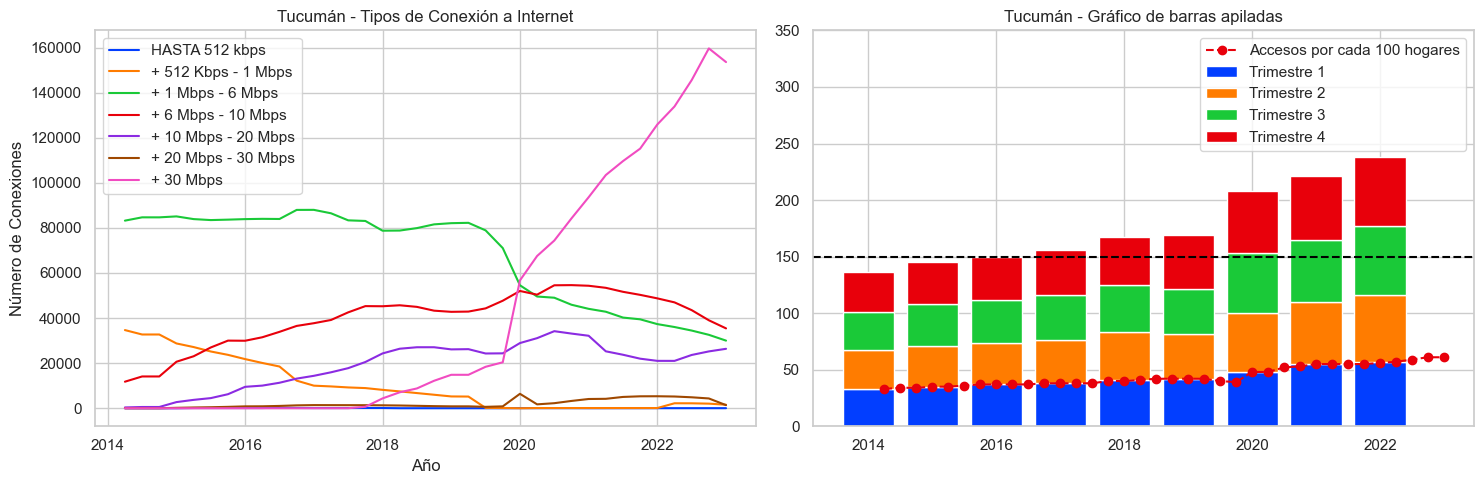

In [150]:
for x in velocidad_provincia['Provincia'].unique():

    df_provincia = velocidad_provincia[velocidad_provincia['Provincia'] == x]
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == x]

    # Configurar el tamaño y diseño de la figura
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    if len(df_provincia) > 0:
        #---> Gráfico 1 - Primer conjunto
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['HASTA 512 kbps'], label='HASTA 512 kbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 30 Mbps'], label='+ 30 Mbps')

        axs[0].set_title(f'{x} - Tipos de Conexión a Internet')
        axs[0].set_xlabel('Año')
        axs[0].set_ylabel('Número de Conexiones')
        axs[0].legend()

    if len(data_provincia) > 0:
        #---> Gráfico 2 - Segundo conjunto
        years = data_provincia['Año'].unique()
        bottom = np.zeros(len(years))

        axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
        axs[1].set_title(f'{x} - Gráfico de líneas')
        axs[1].set_ylim([0, 100])

        for trimestre in sorted(data_provincia['Trimestre'].unique()):
            data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
            axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
            bottom += data_trimestre['Accesos por cada 100 hogares'].values

        axs[1].set_title(f'{x} - Gráfico de barras apiladas')
        axs[1].legend()
        axs[1].set_ylim([0, 350])
        axs[1].axhline(y=150, linestyle='--', color='black')
    
    plt.tight_layout()
    
    plt.show()


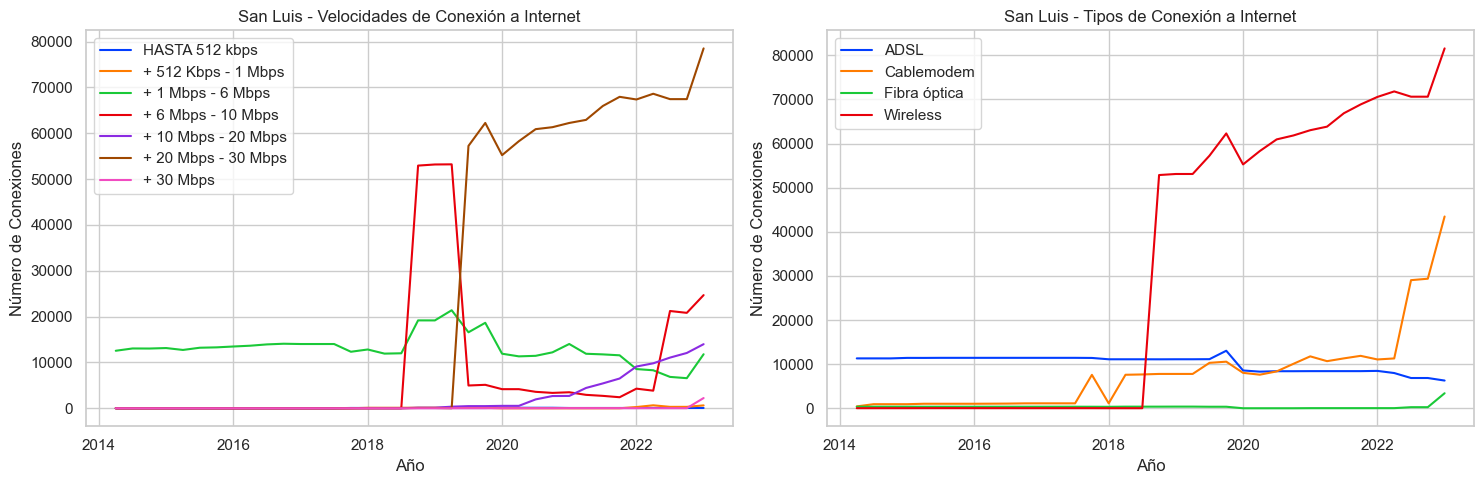

In [158]:
import matplotlib.pyplot as plt

x = 'San Luis'

df_velocidad = velocidad_provincia[velocidad_provincia['Provincia'] == x]
df_tecnologia = tecnologia_provincia[tecnologia_provincia['Provincia'] == x]


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#---> Gráfico 1 - Velocidades de conexión
if len(df_velocidad) > 0:
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['HASTA 512 kbps'], label='HASTA 512 kbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 30 Mbps'], label='+ 30 Mbps')

    axs[0].set_title(f'{x} - Velocidades de Conexión a Internet')
    axs[0].set_xlabel('Año')
    axs[0].set_ylabel('Número de Conexiones')
    axs[0].legend()

#---> Gráfico 2 - Tipos de conexión a internet
if len(df_tecnologia) > 0:
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['ADSL'], label='ADSL')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Cablemodem'], label='Cablemodem')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Fibra óptica'], label='Fibra óptica')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Wireless'], label='Wireless')

    axs[1].set_title(f'{x} - Tipos de Conexión a Internet')
    axs[1].set_xlabel('Año')
    axs[1].set_ylabel('Número de Conexiones')
    axs[1].legend()

plt.tight_layout()

plt.show()



#### En este grafico podemos interpretar el incremento en las metricas

Bibliografia:
- https://ushuaia24.com.ar/contenido/1816/mejora-el-servicio-tierra-del-fuego-se-une-a-la-red-de-fibra-optica
- https://agenciasanluis.com/notas/2018/07/13/el-servicio-de-wifi-gratuito-amplia-los-beneficios-transversalmente-a-todos-los-sectores-de-la-comunidad-de-san-luis/